In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# for making the graphs
import plotly.graph_objects as go
import networkx as nx

# Introduction

Some interesting papers: 
- Visibility graphs overview: https://www.semanticscholar.org/paper/From-time-series-to-complex-networks%3A-The-graph-Lacasa-Luque/a0c1483e0e34fb9bc1baf929ce892f111e329fa6
- Horizontal visibility graphs used with EEGs: https://www.semanticscholar.org/paper/Multiplex-Limited-Penetrable-Horizontal-Visibility-Cai-Gao/a518f709742b1e61066bcdbb20811a8a0c0d4953
- Another use of visibility graphs w/ EEGs: https://www.semanticscholar.org/paper/Analysis-of-Spontaneous-EEG-Activity-in-Alzheimer%E2%80%99s-Cai-Deng/87af7384931b521fded2d0186e40ff38291038e6
  
  
 There is a plethora of ways to create a graph from a time series. One natural family of methods is called *visibility graphs* where we connect only those neighboring points which within the line of sight of each other. Broadly speaking there are two distinct subsets of these methods: 
 1. Standard Visibility Graph - Neighboring points $(t_a, y_a)$ and $(t_b, y_b)$ are connected if $\forall$ $t_c\in (t_a, t_b)$, the corresponding $y_c$ satisfy 
 $$ y_c < y_b + (y_a-y_b)\frac{t_b - t_c}{t_b - t_a} $$ 
 which is just the statement that the line going from $(t_a, y_a)$ to $(t_b, y_b)$ must have a slope less than that of every line between $(t_c, y_c)$ and $(t_b, y_b)$ in between. 
 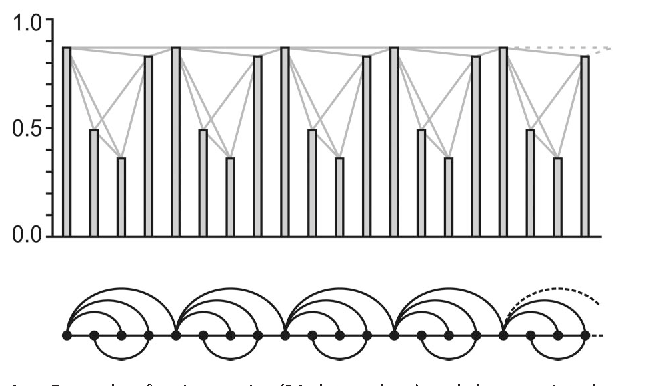
 
 2. (Still need to code) Horizontal visibility graph - Each point is connected all neighbors (to the left and right) that lie within its direct horizontal line of sight: 
 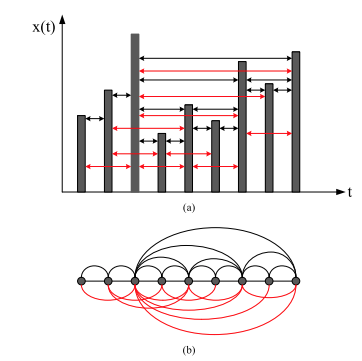

# 1. Visibility graphs for time series

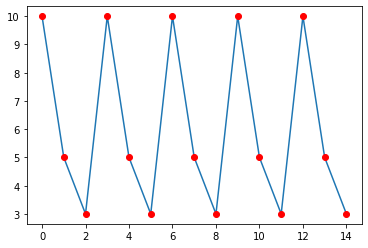

In [2]:
# first, we create a mock time series

#t = np.linspace(0, 10*np.pi, 100) 
#y1 = np.sin(t) 
#y2 = np.cos(3*t) 
#y = y1+0.25*y2 

y = np.array([10, 5, 3, 10, 5, 3, 10, 5, 3, 10, 5, 3, 10, 5, 3,])
t = np.array(range(len(y)))
plt.figure() 
plt.plot(t, y, ) 
plt.plot(t, y, 'ro')
plt.show()

To create a visibility graph, we connect any two data points $(t_a, y_a)$ and $(t_b, y_b)$ if for any $t_c\in(t_a, t_b)$,

$$ y_c < y_b + (y_a-y_b)\dfrac{t_b-t_c}{t_b-t_a}$$

In [3]:
# begin by initializing adjacency matrix to zeros 

Adjacency = np.zeros((len(y), len(y)))

In [4]:
# define function to check if two values of time series are visible to one another

def isVisible(l, r, t, y): 
    if l > r: 
        temp = l
        l = r 
        r = temp 
    if l == r: 
        return False
    else: 
        ta = t[l]
        ya = y[l] 
        tb = t[r]
        yb = y[r] 

        tc = t[l+1:r] 
        yc = y[l+1:r] 
        
        rhs = yb + (ya-yb)*((tb-tc)/(tb-ta))
        check = np.array(yc < rhs )
        return check.all()

Note: we could instead try using horizontal visibility graphs where each node can only look directly forwards or backwards. 

In [5]:
for i in range(len(y)): 
    ta = t[i]
    ya = y[i]
    
    for j in range(len(y)): 
        Adjacency[i, j] = isVisible(i, j, t, y)


(-0.5, 14.5, 14.5, -0.5)

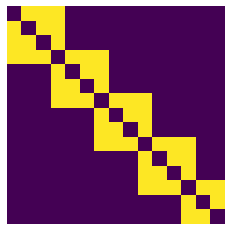

In [11]:
plt.imshow(Adjacency)
plt.axis('off')

In [7]:
# put everything together into one function: 
def getVisibilityGraph(t, y): 
    Adjacency = np.zeros((len(y), len(y)))
   matrix of
    for i in range(len(y)): 
        ta = t[i]
        ya = y[i]  
        for j in range(len(y)): 
            Adjacency[i, j] = isVisible(i, j, t, y)
            
    return Adjacency

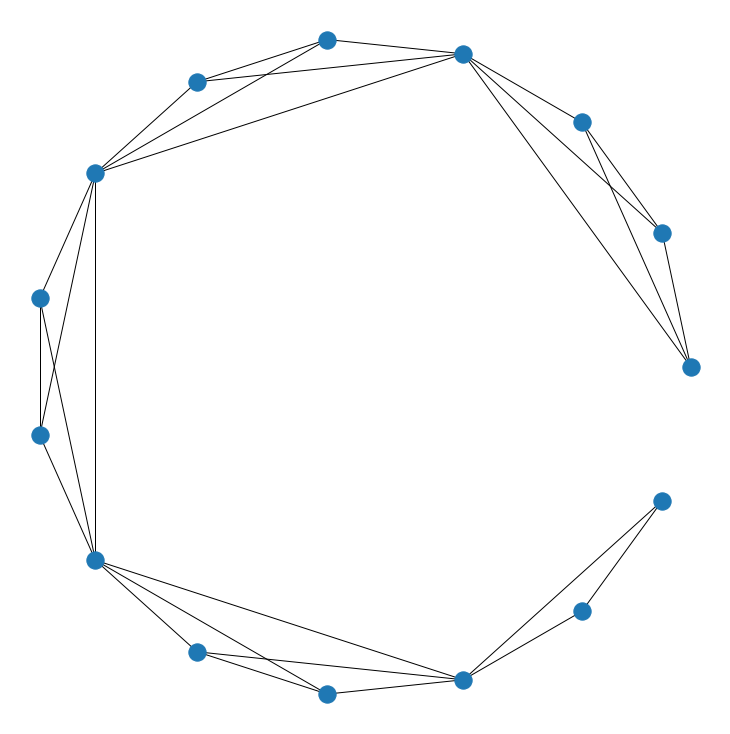

In [8]:
plt.figure(figsize=(10, 10))
G=nx.from_numpy_matrix(getVisibilityGraph(t, y))
pos = nx.circular_layout(G) # plot nodes on a circle for reproducability
nx.draw(G, pos)
ax = plt.gca() 
ax.set_aspect('equal')

# 2. Computing graph spectrum 

Given the adjacency matrix $A$, we can compute it's eigenvalues to construct it's spectrum

In [20]:
A = getVisibilityGraph(t, y)
vals, vecs = np.linalg.eig(A)

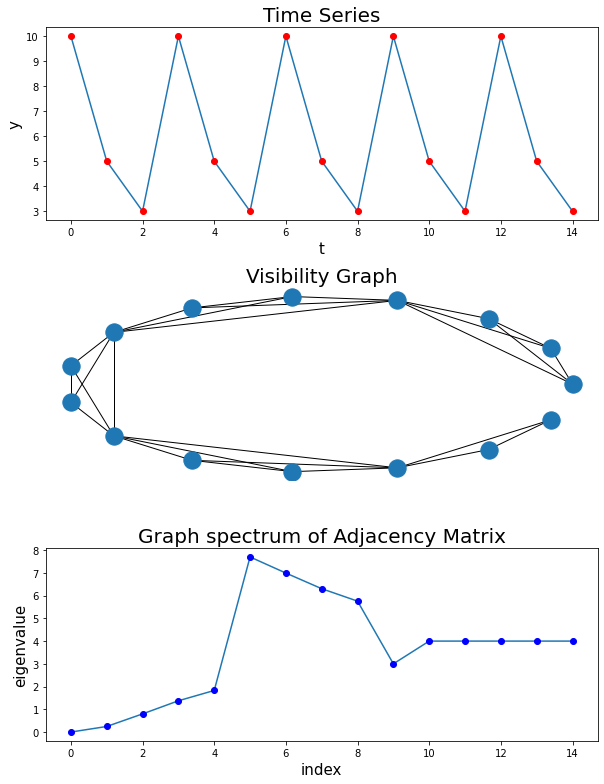

In [25]:
# Plot figure with subplots of different sizes
fig, ax = plt.subplots(3, 1, figsize=(8.5, 11)) 

ax[0].plot(t, y, ) 
ax[0].plot(t, y, 'ro')
ax[0].set_xlabel('t', fontsize=15)
ax[0].set_ylabel('y', fontsize=15)
ax[0].set_title('Time Series', fontsize=20)

ax[2].set_ylabel("eigenvalue",fontsize=15)
ax[2].set_xlabel("index", fontsize=15)
ax[2].set_title('Graph spectrum of Adjacency Matrix', fontsize=20)
ax[2].plot(vals)
ax[2].plot(vals, 'bo')

plt.sca(ax[1]) 
G=nx.from_numpy_matrix(getVisibilityGraph(t, y))
pos = nx.circular_layout(G)
nx.draw(G, pos)
plt.title('Visibility Graph', fontsize=20)


plt.tight_layout()

plt.savefig('../visibility-graph.pdf')

# 3 Other matrix representations

We can also compute the Laplacian matrix which is defined as
$$L = D-A$$ 
where $A$ is the usual Adjacency matrix and $D$ is the "degree" matrix which is a diagonal matrix with each value indicating the number of edges for each node. 

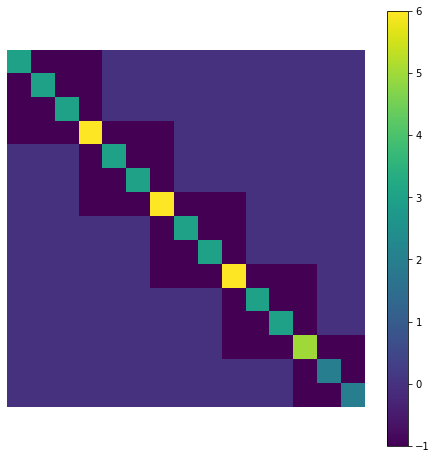

In [27]:
sums = np.sum(A, axis=0)
D = np.diag(sums)

L = D - A

plt.figure(figsize=(8,8))
plt.imshow(L)
plt.axis('off')
cb = plt.colorbar()

Now we can compute the spectrum of the Laplacian matrix (this is apparently a "graph invariant")

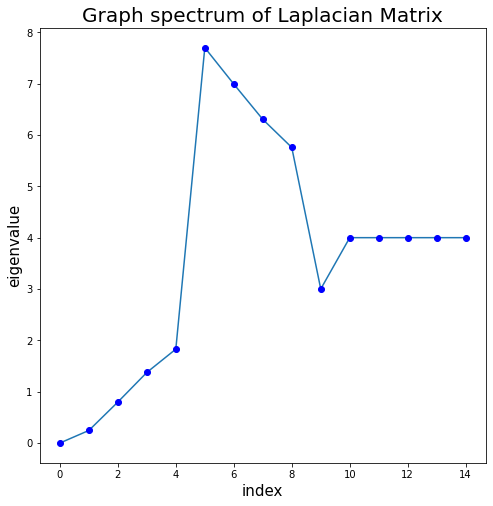

In [28]:
vals, vecs = np.linalg.eig(L)

plt.figure(figsize=(8,8))
ax = plt.gca()
ax.set_ylabel("eigenvalue",fontsize=15)
ax.set_xlabel("index", fontsize=15)
ax.set_title('Graph spectrum of Laplacian Matrix', fontsize=20)
ax.plot(vals)
ax.plot(vals, 'bo')
